In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**EDA**

In [3]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


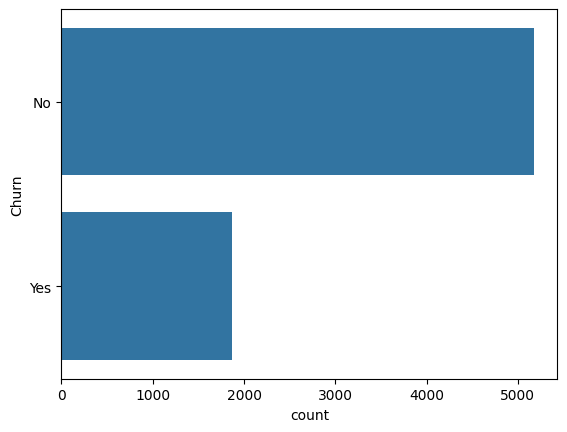

In [4]:
sns.countplot(data['Churn'])
plt.show()

**DATA CLEANING**

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [7]:
data.drop(['customerID'], axis=1, inplace=True)

In [8]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column])

# Split data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize numerical columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

ROC-AUC Score: 0.7351356032357316


In [12]:
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

ROC-AUC Score: 0.6941665364857492


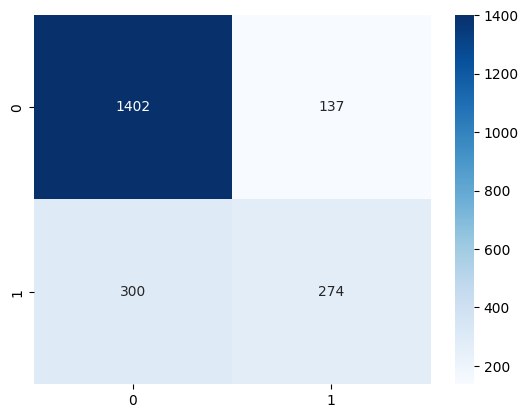

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

**Analisis Data**

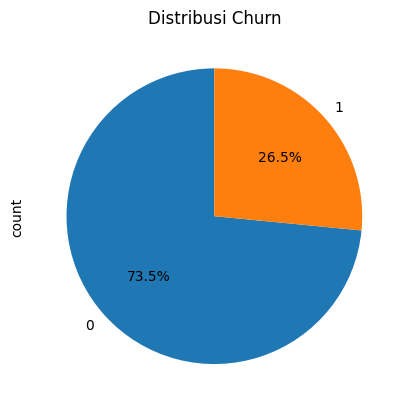

In [ ]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Churn')
plt.show()

Dari grafik, terlihat bahwa mayoritas pelanggan belum melakukan churn (berhenti berlangganan), sementara sejumlah yang lebih kecil telah churn. Ini memberikan gambaran awal bahwa tingkat churn mungkin cukup signifikan dan layak untuk diselidiki lebih lanjut untuk menemukan faktor-faktor yang mungkin mempengaruhinya.

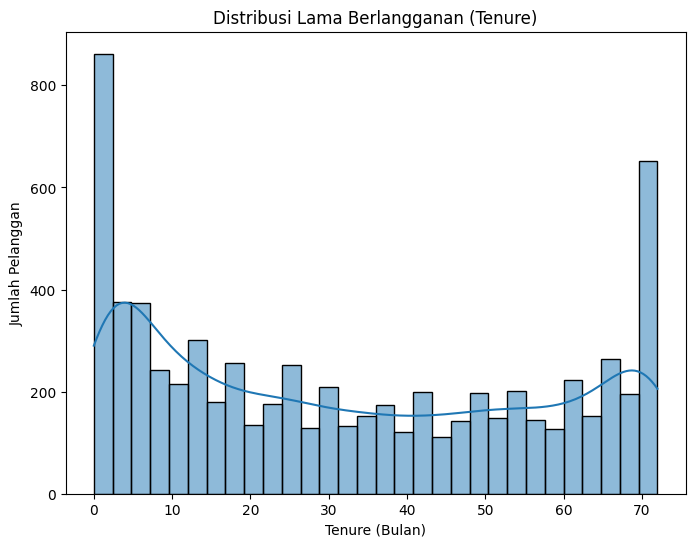

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], kde=True, bins=30)
plt.title('Distribusi Lama Berlangganan (Tenure)')
plt.xlabel('Tenure (Bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

* Ada puncak signifikan pada awal grafik, menunjukkan banyak pelanggan baru yang memiliki lama berlangganan sangat pendek, kurang dari 10 bulan.
* Grafik menunjukkan penurunan yang stabil dalam frekuensi setelah periode awal, dengan puncak lainnya yang terjadi pada pelanggan dengan lama berlangganan yang sangat panjang, sekitar 70 bulan. Ini menunjukkan bahwa setelah periode tertentu, pelanggan cenderung bertahan untuk jangka waktu yang lama.
* Terdapat pengurangan secara bertahap dalam jumlah pelanggan dari tenure 10 bulan hingga sekitar 60 bulan.

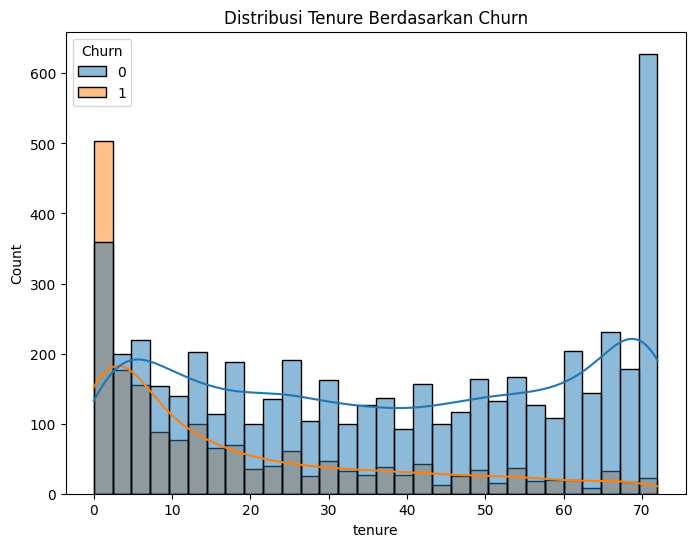

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribusi Tenure Berdasarkan Churn')
plt.show()

Grafik di atas menunjukkan distribusi churn berdasarkan lama berlangganan (tenure) pelanggan. Berikut adalah beberapa temuan penting:

* Pelanggan dengan lama berlangganan yang sangat singkat (kurang dari 10 bulan) cenderung memiliki tingkat churn yang tinggi. Hal ini bisa menunjukkan bahwa pengalaman awal atau periode trial mungkin tidak memuaskan bagi sebagian pelanggan baru.
* Setelah periode awal, tingkat churn menurun secara signifikan, yang mengindikasikan bahwa pelanggan yang bertahan lebih lama cenderung lebih puas dan tidak berhenti berlangganan.
* Pelanggan dengan lama berlangganan sangat panjang (60-70 bulan) menunjukkan tingkat churn yang sangat rendah, yang bisa jadi menunjukkan tingkat loyalitas yang tinggi atau kepuasan yang tinggi dengan layanan yang mereka terima.

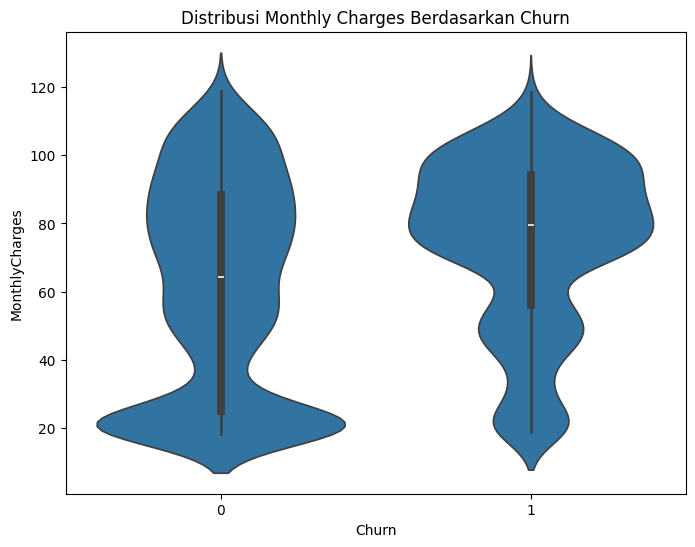

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Distribusi Monthly Charges Berdasarkan Churn')
plt.show()

* Pelanggan yang melakukan churn (1) cenderung memiliki distribusi biaya bulanan yang lebih lebar dan rata-rata yang lebih tinggi dibandingkan dengan mereka yang tidak churn (0). Hal ini menunjukkan bahwa pelanggan dengan biaya bulanan yang lebih tinggi lebih cenderung untuk churn, mungkin karena mencari opsi yang lebih murah atau tidak merasa mendapatkan nilai yang cukup dari biaya yang mereka bayar.
* Bagi pelanggan yang tidak churn, distribusi biaya bulanan terkonsentrasi pada nilai yang lebih rendah, menunjukkan bahwa pelanggan dengan biaya lebih rendah cenderung lebih puas atau setidaknya tidak cukup termotivasi untuk berhenti berlangganan.

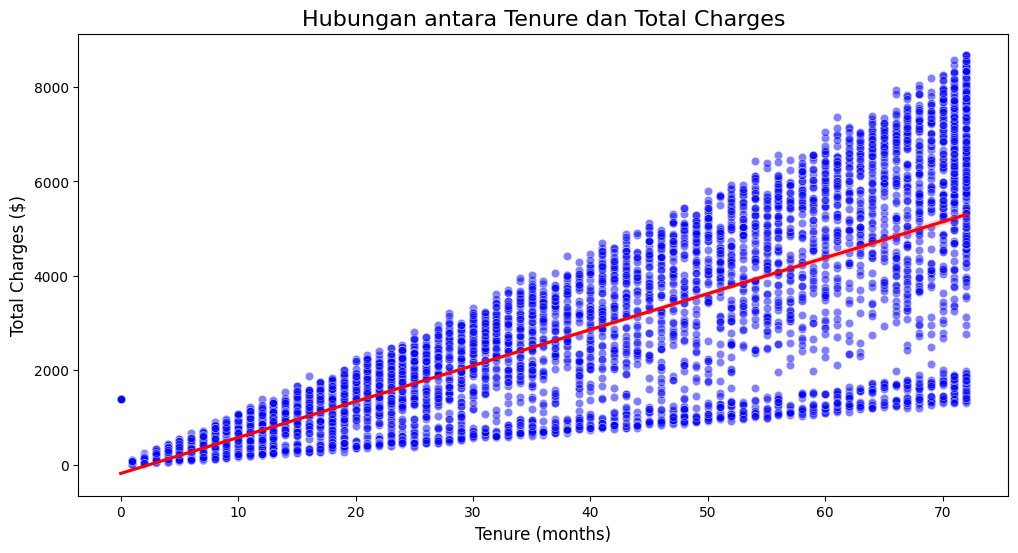

In [14]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='tenure', y='TotalCharges', data=data, color='blue', alpha=0.5)
sns.regplot(x='tenure', y='TotalCharges', data=data, scatter=False, color='red')

plt.title('Hubungan antara Tenure dan Total Charges', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)

plt.show()

* Ada korelasi positif yang kuat antara tenure dan total biaya. Ini berarti semakin lama seorang pelanggan berlangganan, semakin banyak total biaya yang mereka akumulasikan. Garis regresi merah menunjukkan tren naik yang jelas.
* Data menunjukkan bahwa beberapa pelanggan dengan lama berlangganan yang pendek memiliki total biaya yang rendah, yang masuk akal karena mereka belum banyak membayar biaya bulanan.
* Pelanggan dengan lama berlangganan yang panjang cenderung memiliki variasi yang lebih besar dalam total biaya, mencerminkan perbedaan dalam paket layanan atau perubahan tarif seiring waktu.

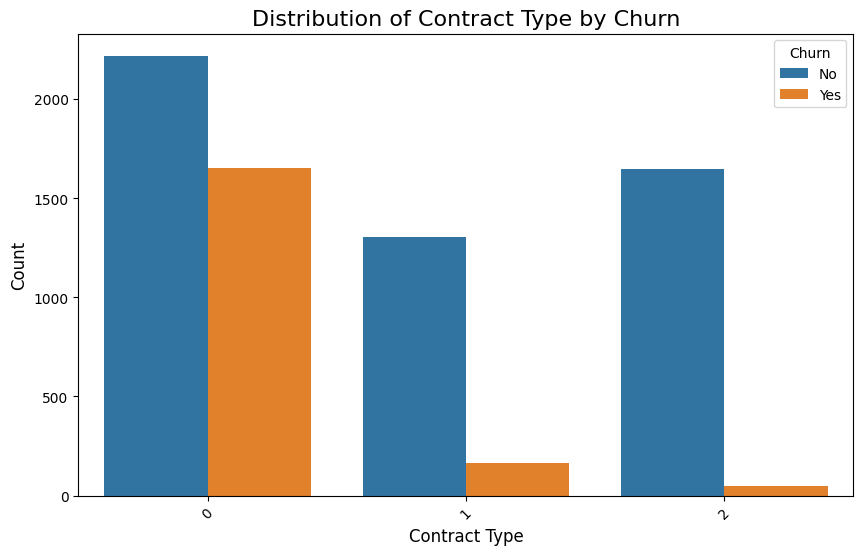

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)

plt.title('Distribution of Contract Type by Churn', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)

plt.show()

* Kontrak Bulanan (Month-to-month): Paling kiri (0), menunjukkan tingkat churn yang paling tinggi, yang menunjukkan bahwa pelanggan dengan komitmen jangka pendek lebih cenderung berhenti berlangganan.
* Kontrak Satu Tahun (One year): Kontrak dengan durasi menengah ini menunjukkan tingkat churn yang lebih rendah dibandingkan kontrak bulanan.
* Kontrak Dua Tahun (Two year): Paling kanan (2), dengan tingkat churn yang paling rendah, menunjukkan bahwa pelanggan dengan komitmen jangka panjang cenderung paling stabil.

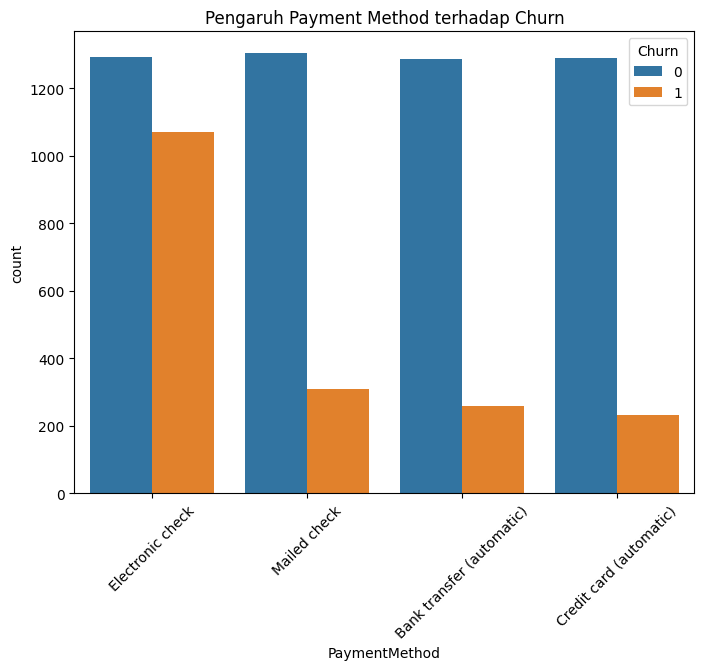

In [15]:
payment_method_labels = {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
data['PaymentMethod'] = data['PaymentMethod'].map(payment_method_labels)

plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Pengaruh Payment Method terhadap Churn')
plt.xticks(rotation=45)
plt.show()

* Electronic Check: Metode pembayaran ini memiliki proporsi churn yang paling tinggi dibandingkan dengan metode lain. Ini menunjukkan bahwa pelanggan yang menggunakan pembayaran elektronik mungkin lebih mudah untuk berpindah layanan atau tidak merasa terikat dengan kontrak jangka panjang.

* Mailed Check, Bank Transfer (automatic), dan Credit Card (automatic): Ketiga metode pembayaran ini menunjukkan tingkat churn yang lebih rendah. Pembayaran otomatis (baik melalui transfer bank maupun kartu kredit) tampaknya memberikan kestabilan lebih dan mungkin mengurangi kemungkinan pelanggan untuk churn karena aspek kemudahan dan otomatisasi dalam pembayaran bulanan.

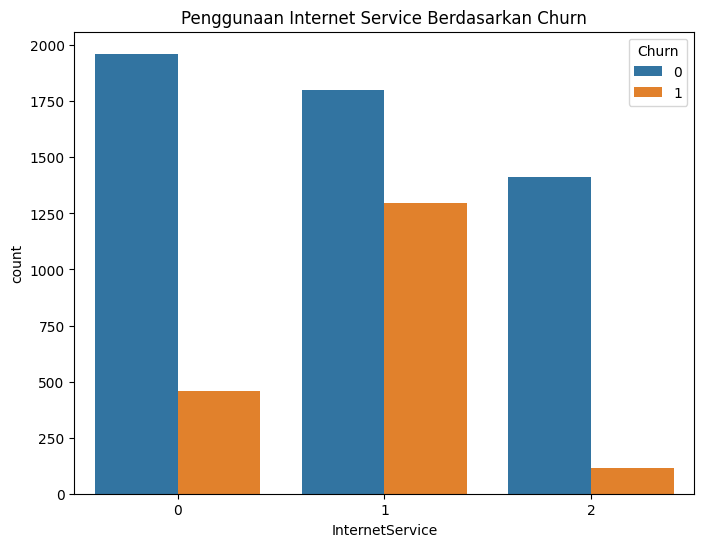

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Penggunaan Internet Service Berdasarkan Churn')
plt.show()

* Jenis Layanan Pertama (DSL): Menunjukkan jumlah churn yang lebih rendah dibandingkan jumlah pelanggan yang tetap (tidak churn).
* Jenis Layanan Kedua (Fiber Optic): Memiliki jumlah churn yang relatif tinggi dibandingkan dengan pelanggan yang tetap.
* Jenis Layanan Ketiga: Mewakili pelanggan yang tidak menggunakan layanan internet ("No"), menunjukkan jumlah churn yang sangat rendah, yang mengindikasikan bahwa pelanggan tanpa layanan internet cenderung sangat jarang churn.

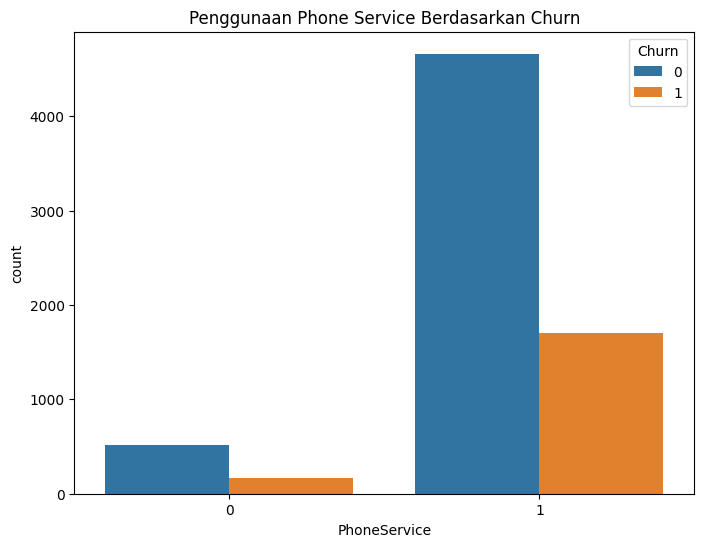

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('Penggunaan Phone Service Berdasarkan Churn')
plt.show()

* Mayoritas pelanggan menggunakan layanan telepon "Yes" (1), dengan sebagian besar dari mereka tidak melakukan churn.
* Pelanggan yang tidak menggunakan layanan telepon "No" (0) jumlahnya lebih sedikit dan proporsi churn di grup ini juga lebih rendah dibandingkan dengan yang menggunakan layanan telepon, tetapi karena jumlahnya yang lebih kecil, sulit untuk mengambil kesimpulan yang signifikan hanya dari data ini.

Tampaknya layanan telepon sangat populer di antara pelanggan, namun tingkat churn relatif lebih tinggi di kalangan yang menggunakan layanan ini dibandingkan dengan mereka yang tidak. Hal ini bisa menunjukkan adanya potensi untuk meningkatkan kepuasan pelanggan atau mungkin menawarkan paket yang lebih menarik bagi pengguna layanan telepon untuk mengurangi tingkat churn